In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

df = pd.read_csv('RedditTokenized.csv')
df.head()

,comment,hate_speech,tokens,tokens_spacy,word2vec_vector,cleaned_comment,fasttext_vector
0,A subsection of retarded Hungarians? Oh boy. b...,1,"['a', 'subsection', 'of', 'retarded', 'hungari...","['a', 'subsection', 'of', 'retarded', 'hungari...",[ 0.36349716 -0.22094536 0.01051669 -0.602767...,a subsection of retarded hungarians oh boy bra...,"[0.004770048428326845, -0.03953176364302635, -..."
1,Iii. Just got off work. Foundation and groundi...,0,"['iii', '.', 'just', 'got', 'off', 'work', '.'...","['iii', '.', 'just', 'got', 'off', 'work', '.'...",[ 0.06504157 -0.12219669 0.10038512 -0.005708...,iii just got off work foundation and grounding...,"[-0.012044071219861507, -0.011684201657772064,..."
2,wow i guess cowboys are the same in every country,0,"['wow', 'i', 'guess', 'cowboys', 'are', 'the',...","['wow', 'i', 'guess', 'cowboys', 'are', 'the',...",[ 2.92166289e-01 3.85734248e-01 -4.80327269e-...,wow i guess cowboys are the same in every country,"[-0.0008766286191530526, 0.0192383024841547, 0..."
3,Owen Benjamin's cowboy song goes for every cou...,0,"['owen', 'benjamin', ""'s"", 'cowboy', 'song', '...","['owen', 'benjamin', ""'s"", 'cowboy', 'song', '...",[ 0.07474209 0.08315161 -0.081609 -0.397689...,owen benjamins cowboy song goes for every coun...,"[0.00418263953179121, -0.0029789397958666086, ..."
4,"> ""y'all hear sun?"" by all means I live in a s...",0,"['>', '``', ""y'all"", 'hear', 'sun', '?', ""''"",...","['>', '""', ""y'"", 'all', 'hear', 'sun', '?', '""...",[ 0.19263356 -0.10749349 -0.08967624 -0.271426...,yall hear sun by all means i live in a small t...,"[-6.847345503047109e-05, 0.0004209601611364633..."


#### Convert Text to Numerical Format using TF-IDF:

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the TF-IDF vectorizer with additional parameters
vectorizer = TfidfVectorizer(min_df=2, max_df=0.95, stop_words='english')

# Drop rows with missing comments
df = df.dropna(subset=['cleaned_comment'])

# Fit and transform the text data to TF-IDF representation
X_tfidf = vectorizer.fit_transform(df['cleaned_comment'])

# Convert to DataFrame for ease of handling
X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

# Display the transformed data
#print(X_tfidf_df.head())


### Train and Test Splitting

In [3]:
# Define the target variable
y = df['hate_speech']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_tfidf_df, y, test_size=0.2, random_state=42)

# Display the shapes of the datasets
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (17769, 16626)
Testing data shape: (4443, 16626)


Class Counts:
 hate_speech
0    16925
1     5287
Name: count, dtype: int64
Class Proportions:
 hate_speech
0    0.761976
1    0.238024
Name: proportion, dtype: float64


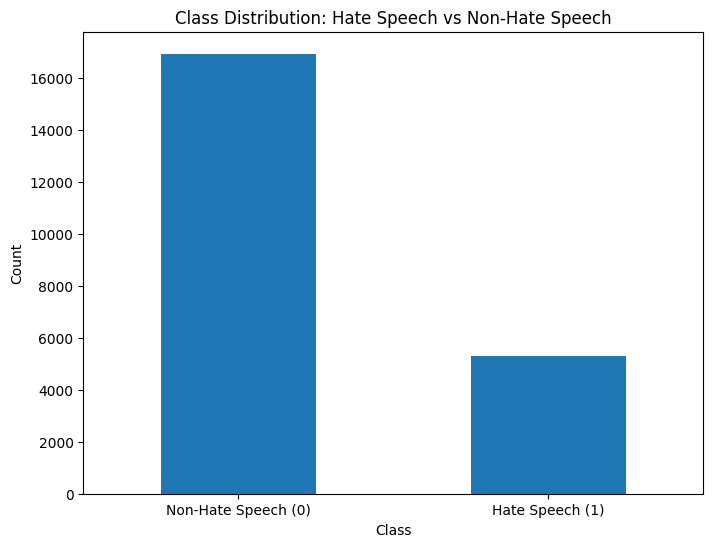

The dataset is imbalanced.


In [4]:
import matplotlib.pyplot as plt

hate_speech_counts = df['hate_speech'].value_counts()
print("Class Counts:\n", hate_speech_counts)

# Calculate the proportion of each class
hate_speech_proportions = df['hate_speech'].value_counts(normalize=True)
print("Class Proportions:\n", hate_speech_proportions)

# Plot the distribution of the 'hate_speech' column
plt.figure(figsize=(8, 6))
hate_speech_counts.plot(kind='bar')
plt.title('Class Distribution: Hate Speech vs Non-Hate Speech')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Hate Speech (0)', 'Hate Speech (1)'], rotation=0)
plt.show()

# Assess balance
threshold = 0.1  # Example threshold for determining balance
is_balanced = all(abs(hate_speech_proportions - hate_speech_proportions.mean()) < threshold)
print(f"The dataset is {'balanced' if is_balanced else 'imbalanced'}.")

## Improving model
#### Techniques for Handling Imbalanced Data

In [5]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt


#### Apply SMOTE to the Training Set:
##### Use SMOTE to generate synthetic samples for the minority class:

In [6]:
# Initialize the SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Display the new class distribution
print("Class distribution after applying SMOTE:")
print(Counter(y_train_resampled))


Class distribution after applying SMOTE:
Counter({0: 13561, 1: 13561})


#### Verify the Class Distribution:
##### Check if the data is balanced after applying SMOTE:

Class Proportions after Resampling:
{0: 0.5, 1: 0.5}


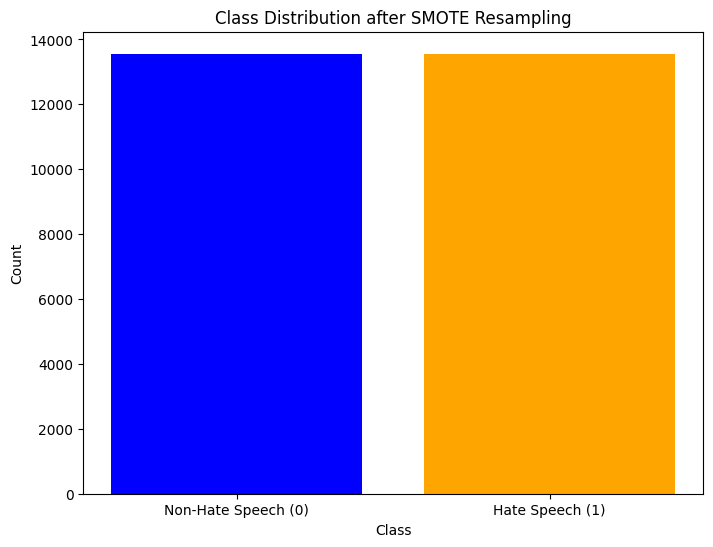

In [7]:
# Calculate the class proportions
total_count = sum(Counter(y_train_resampled).values())
class_proportions = {k: v / total_count for k, v in Counter(y_train_resampled).items()}

# Print class proportions
print("Class Proportions after Resampling:")
print(class_proportions)

# Visualize the class distribution
plt.figure(figsize=(8, 6))
plt.bar(Counter(y_train_resampled).keys(), Counter(y_train_resampled).values(), color=['blue', 'orange'])
plt.title('Class Distribution after SMOTE Resampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(list(Counter(y_train_resampled).keys()), ['Non-Hate Speech (0)', 'Hate Speech (1)'])
plt.show()


In [12]:
import pandas as pd

chunk_size = 1000  # Adjust chunk size as needed
num_chunks = int(len(X_train_resampled) / chunk_size) + 1

for i in range(num_chunks):
    start_idx = i * chunk_size
    end_idx = min((i + 1) * chunk_size, len(X_train_resampled))
    
    chunk_df = pd.DataFrame(X_train_resampled[start_idx:end_idx], columns=vectorizer.get_feature_names_out())
    chunk_df['hate_speech'] = y_train_resampled[start_idx:end_idx]
    
    if i == 0:
        chunk_df.to_csv("balanced_train_data_chunked.csv", index=False, mode='w')
    else:
        chunk_df.to_csv("balanced_train_data_chunked.csv", index=False, mode='a', header=False)

print("Data saved in chunks.")


C:\Users\Aman Shekhar Sachan\AppData\Local\Temp\ipykernel_5140\3881858170.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  chunk_df['hate_speech'] = y_train_resampled[start_idx:end_idx]
C:\Users\Aman Shekhar Sachan\AppData\Local\Temp\ipykernel_5140\3881858170.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  chunk_df['hate_speech'] = y_train_resampled[start_idx:end_idx]
C:\Users\Aman Shekhar Sachan\AppData\Local\Temp\ipykernel_5140\3881858170.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the 

Data saved in chunks.
